In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
#solves SSLError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

Files already downloaded and verified
Files already downloaded and verified


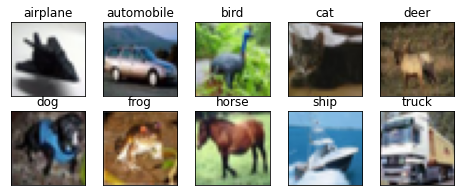

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [5]:
len(cifar10)

50000

In [6]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FC2436B10B8>,
 1,
 'automobile')

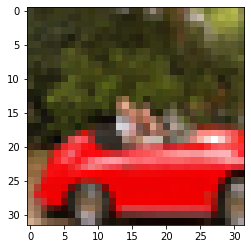

In [7]:
plt.imshow(img)
plt.show()

In [8]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [9]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [10]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [11]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [12]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [13]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

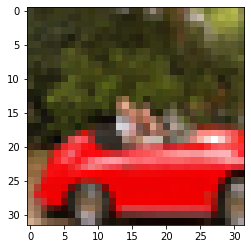

In [14]:
# we have to use permute to change the order of the axes from C × H × W to H × W × C to match what Matplotlib expects.
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [15]:
'''
Normalize the dataset so that each channel has zero mean and unitary standard deviation. By choosing
activation functions that are linear around 0 plus or minus 1 (or 2), keeping the data in the same 
range means it’s more likely that neurons have nonzero gradients and,
hence, will learn sooner. Also, normalizing each channel so that it has the same
distribution will ensure that channel information can be mixed and updated through
gradient descent using the same learning rate.

'''
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [16]:
'''R
ecall that view(3, -1) keeps the three channels and
merges all the remaining dimensions into one, figuring
out the appropriate size. Here our 3 × 32 × 32 image is
transformed into a 3 × 1,024 vector, and then the mean
is taken over the 1,024 elements of each channel.
'''
imgs.view(3, -1).mean(dim=1)  # <1>

tensor([0.4914, 0.4822, 0.4465])

In [18]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [19]:
# Apply transforms.Normalize producing the following transform: v_n[c] = (v[c] - mean[c]) /stdev[c]

transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


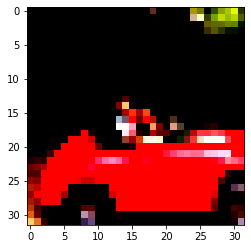

In [26]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()